In [78]:
# %pip install geopandas pandas folium requests matplotlib

take care of the imports

In [79]:
import geopandas as gpd
import requests
import pandas as pd

# for file processing
import zipfile
import os
import shutil

Download the shapefiles from the US Census then unzip the file to data/

In [80]:
# load all of the counties as a zip file
# this location is for references, but you have to download it yourself
file_location = "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_20m.zip"

county_file_name = "data/cb_2022_us_county_20m/cb_2022_us_county_20m.shp"
nri_county_file_name = "data/NRI_Shapefile_Counties/NRI_Shapefile_Counties.shp"

In [81]:
counties = gpd.read_file(county_file_name)
nri_counties = gpd.read_file(nri_county_file_name)

Get a list of all state names and their codes
Not needed if you want to search by state name instead

In [82]:
# find state codes
state_code_list = counties[['STATEFP', 'STATE_NAME']].drop_duplicates().sort_values('STATE_NAME')
state_code_list = state_code_list.rename(columns={'STATEFP': 'State Code', 'STATE_NAME': 'State Name'})

print(state_code_list.to_string(index=False, justify='right'))

State Code           State Name
        01              Alabama
        02               Alaska
        04              Arizona
        05             Arkansas
        06           California
        08             Colorado
        09          Connecticut
        10             Delaware
        11 District of Columbia
        12              Florida
        13              Georgia
        15               Hawaii
        16                Idaho
        17             Illinois
        18              Indiana
        19                 Iowa
        20               Kansas
        21             Kentucky
        22            Louisiana
        23                Maine
        24             Maryland
        25        Massachusetts
        26             Michigan
        27            Minnesota
        28          Mississippi
        29             Missouri
        30              Montana
        31             Nebraska
        32               Nevada
        33        New Hampshire
        

Find the field names, because they're different in the datasets

In [83]:
# print fields in nri_counties
nri_counties_fields = nri_counties.columns.tolist()
print("NRI Counties Fields:")
for field in nri_counties_fields:
    print(f"  {field}")

# print top 5 rows of nri_counties
print("NRI Counties Top 5 Rows:")
print(nri_counties.head(5).to_string(index=False, justify='right'))


NRI Counties Fields:
  NRI_ID
  STATE
  STATEABBRV
  STATEFIPS
  COUNTY
  COUNTYTYPE
  COUNTYFIPS
  STCOFIPS
  POPULATION
  BUILDVALUE
  AGRIVALUE
  AREA
  RISK_VALUE
  RISK_SCORE
  RISK_RATNG
  RISK_SPCTL
  EAL_SCORE
  EAL_RATNG
  EAL_SPCTL
  EAL_VALT
  EAL_VALB
  EAL_VALP
  EAL_VALPE
  EAL_VALA
  ALR_VALB
  ALR_VALP
  ALR_VALA
  ALR_NPCTL
  ALR_VRA_NP
  SOVI_SCORE
  SOVI_RATNG
  SOVI_SPCTL
  RESL_SCORE
  RESL_RATNG
  RESL_SPCTL
  RESL_VALUE
  CRF_VALUE
  AVLN_EVNTS
  AVLN_AFREQ
  AVLN_EXP_A
  AVLN_EXPB
  AVLN_EXPP
  AVLN_EXPPE
  AVLN_EXPT
  AVLN_HLRB
  AVLN_HLRP
  AVLN_HLRR
  AVLN_EALB
  AVLN_EALP
  AVLN_EALPE
  AVLN_EALT
  AVLN_EALS
  AVLN_EALR
  AVLN_ALRB
  AVLN_ALRP
  AVLN_ALR_N
  AVLN_RISKV
  AVLN_RISKS
  AVLN_RISKR
  CFLD_EVNTS
  CFLD_AFREQ
  CFLD_EXP_A
  CFLD_EXPB
  CFLD_EXPP
  CFLD_EXPPE
  CFLD_EXPT
  CFLD_HLRB
  CFLD_HLRP
  CFLD_HLRR
  CFLD_EALB
  CFLD_EALP
  CFLD_EALPE
  CFLD_EALT
  CFLD_EALS
  CFLD_EALR
  CFLD_ALRB
  CFLD_ALRP
  CFLD_ALR_N
  CFLD_RISKV
  CFLD_RISKS
  CFLD_R

Select your state of interest

In [84]:
# Filter counties for Washington state and display their names

# in this table, the state name is STATE_NAME
washington_counties = counties[counties['STATE_NAME'] == 'Washington']
print("Counties in Washington:")
print(washington_counties['NAME'].tolist())

# in this table, the state name is STATE
washington_nri_counties = nri_counties[nri_counties['STATE'] == 'Washington']


Counties in Washington:
['Spokane', 'Mason', 'Pend Oreille', 'Adams', 'Lincoln', 'Cowlitz', 'Whatcom', 'Thurston', 'Snohomish', 'Clark', 'Garfield', 'Klickitat', 'Columbia', 'Walla Walla', 'San Juan', 'Kittitas', 'King', 'Stevens', 'Jefferson', 'Franklin', 'Pierce', 'Okanogan', 'Benton', 'Kitsap', 'Clallam', 'Whitman', 'Island', 'Skamania', 'Grays Harbor', 'Pacific', 'Asotin', 'Wahkiakum', 'Douglas', 'Grant', 'Yakima', 'Ferry', 'Skagit', 'Lewis', 'Chelan']


In [85]:
# display headers in washington_nri_counties

for field in washington_nri_counties.columns.tolist():
    print(f"  {field}")


  NRI_ID
  STATE
  STATEABBRV
  STATEFIPS
  COUNTY
  COUNTYTYPE
  COUNTYFIPS
  STCOFIPS
  POPULATION
  BUILDVALUE
  AGRIVALUE
  AREA
  RISK_VALUE
  RISK_SCORE
  RISK_RATNG
  RISK_SPCTL
  EAL_SCORE
  EAL_RATNG
  EAL_SPCTL
  EAL_VALT
  EAL_VALB
  EAL_VALP
  EAL_VALPE
  EAL_VALA
  ALR_VALB
  ALR_VALP
  ALR_VALA
  ALR_NPCTL
  ALR_VRA_NP
  SOVI_SCORE
  SOVI_RATNG
  SOVI_SPCTL
  RESL_SCORE
  RESL_RATNG
  RESL_SPCTL
  RESL_VALUE
  CRF_VALUE
  AVLN_EVNTS
  AVLN_AFREQ
  AVLN_EXP_A
  AVLN_EXPB
  AVLN_EXPP
  AVLN_EXPPE
  AVLN_EXPT
  AVLN_HLRB
  AVLN_HLRP
  AVLN_HLRR
  AVLN_EALB
  AVLN_EALP
  AVLN_EALPE
  AVLN_EALT
  AVLN_EALS
  AVLN_EALR
  AVLN_ALRB
  AVLN_ALRP
  AVLN_ALR_N
  AVLN_RISKV
  AVLN_RISKS
  AVLN_RISKR
  CFLD_EVNTS
  CFLD_AFREQ
  CFLD_EXP_A
  CFLD_EXPB
  CFLD_EXPP
  CFLD_EXPPE
  CFLD_EXPT
  CFLD_HLRB
  CFLD_HLRP
  CFLD_HLRR
  CFLD_EALB
  CFLD_EALP
  CFLD_EALPE
  CFLD_EALT
  CFLD_EALS
  CFLD_EALR
  CFLD_ALRB
  CFLD_ALRP
  CFLD_ALR_N
  CFLD_RISKV
  CFLD_RISKS
  CFLD_RISKR
  CWAV_EVNTS
  C

In [86]:
# keep only these columns in washington_nri_counties

# make a list of all columns that end in '_RISKR' to indicate annualized frequency

RISKR_columns = [col for col in washington_nri_counties.columns if col.endswith('_RISKR')]

keep_columns = ['NRI_ID', 'STATE', 'COUNTY', 'STCOFIPS', 'NRI_VER', 'Shape_Leng', 'Shape_Area', 'geometry'] + RISKR_columns

# create a new dataframe with only the columns we want
washington_nri_counties = washington_nri_counties[keep_columns]

In [87]:
# Filter counties for Texas and display their names
texas_counties = counties[counties['STATE_NAME'] == 'Texas']
print("Counties in Texas:")
print(texas_counties['NAME'].tolist())

Counties in Texas:
['Kleberg', 'Armstrong', 'Gillespie', 'Hays', 'Parmer', 'Midland', 'Hale', 'Robertson', 'Hood', 'Swisher', 'Marion', 'Camp', 'Mitchell', 'Briscoe', 'Polk', 'Crane', 'Castro', 'DeWitt', 'Medina', 'Cochran', 'Childress', 'Crockett', 'Duval', 'Atascosa', 'Bailey', 'Karnes', 'Bosque', 'Brooks', 'Gonzales', 'Kinney', 'Zavala', 'Schleicher', 'Lamb', 'Knox', 'Motley', 'Lampasas', 'Calhoun', 'Real', 'Runnels', 'Loving', 'Sterling', 'Wichita', 'Kenedy', 'Kent', 'Kendall', 'Titus', 'Lee', 'Potter', 'Rusk', 'Sherman', 'Ward', 'Wilson', 'Collingsworth', 'Coryell', 'Fayette', 'McCulloch', 'Van Zandt', 'Houston', 'Chambers', 'Johnson', 'Hartley', 'Fisher', 'Jones', 'Glasscock', 'Hunt', 'Walker', 'Hockley', 'Irion', 'Grayson', 'Coke', 'Hardin', 'Floyd', 'Kimble', 'Reeves', 'Oldham', 'Somervell', 'Moore', 'La Salle', 'Roberts', 'Ellis', 'Live Oak', 'Ochiltree', 'Lubbock', 'Pecos', 'Aransas', 'Erath', 'Dallam', 'Goliad', 'San Jacinto', 'Hemphill', 'Limestone', 'Milam', 'Upshur', 'Tay

<Axes: >

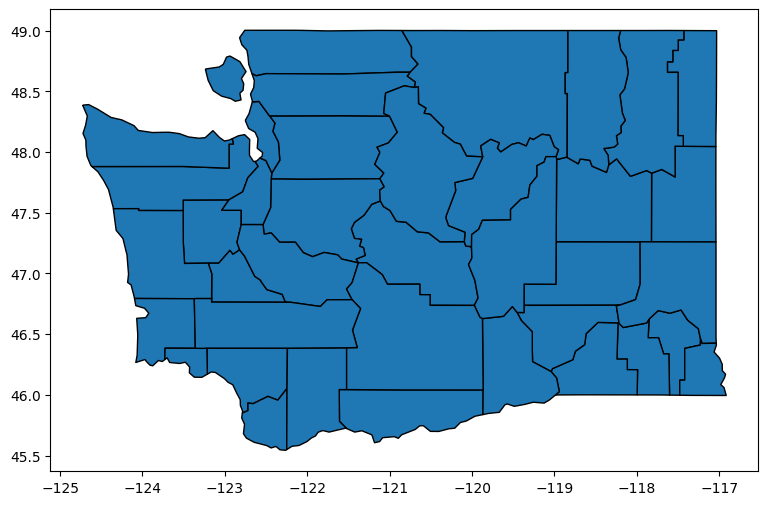

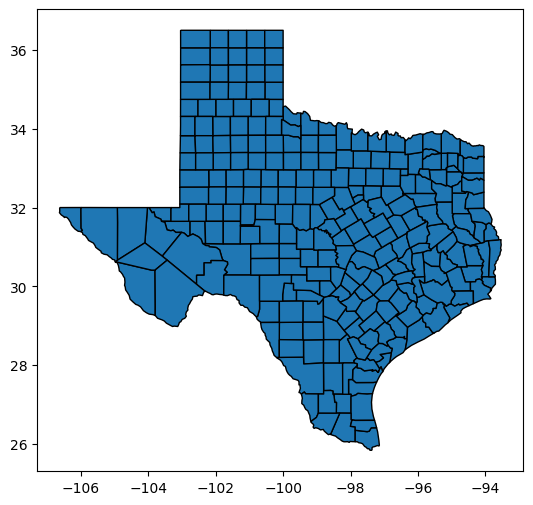

In [88]:
# plot the counties

washington_counties.plot(edgecolor='black', figsize=(10,6))
texas_counties.plot(edgecolor='black', figsize=(10,6))


<Axes: >

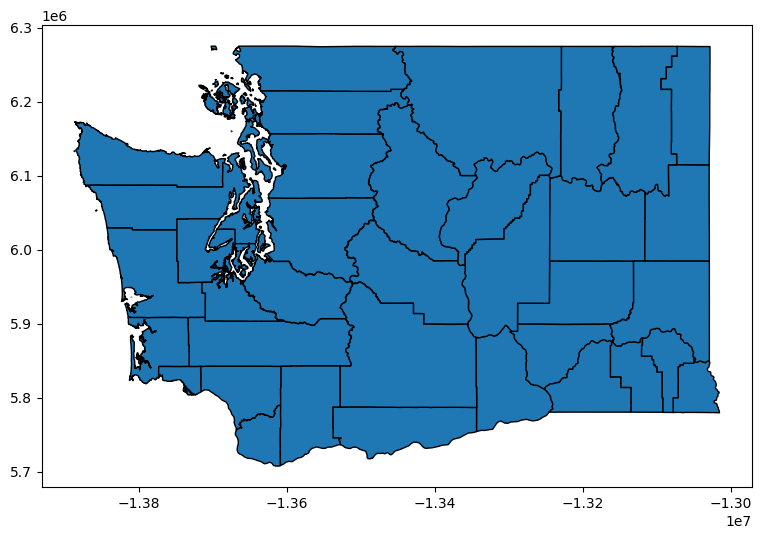

In [89]:
washington_nri_counties.plot(edgecolor='black', figsize=(10,6))

In [90]:
# do the same map but with congressional districts



In [91]:
# dictionary to rename the columns to something readable

rename_column_dict = {
    'COUNTY': 'County',
        'AVLN_RISKR': 'Avalanche',
        'CFLD_RISKR': 'Coastal Flooding',
        'CWAV_RISKR': 'Cold Wave',
        'DRGT_RISKR': 'Drought',
        'ERQK_RISKR': 'Earthquake',
        'HAIL_RISKR': 'Hail',
        'HWAV_RISKR': 'Heat Wave',
        'HRCN_RISKR': 'Hurricane',
        'ISTM_RISKR': 'Ice Storm',
        'LNDSL_RISKR': 'Landslide',
        'LTNG_RISKR': 'Lightning',
        'RFLD_RISKR': 'Riverine Flooding',
        'SWND_RISKR': 'Strong Wind',
        'TRND_RISKR': 'Tornado',
        'TSUN_RISKR': 'Tsunami',
        'VLCN_RISKR': 'Volcanic Activity',
        'WFIR_RISKR': 'Wildfire',
        'WNTW_RISKR': 'Winter Weather',
}

In [92]:
# load csv file
counties_df = pd.read_csv('data/NRI_Table_Counties_Washington.csv')

# display the first few rows to verify the data loaded correctly
print(counties_df.head())

# Optional: Check basic information about the dataframe
print(f"\nDataframe shape: {counties_df.shape}")
print("\nDataframe info:")
counties_df.info()

   OID_  NRI_ID       STATE STATEABBRV  STATEFIPS   COUNTY COUNTYTYPE  \
0  2955  C53001  Washington         WA         53    Adams     County   
1  2956  C53003  Washington         WA         53   Asotin     County   
2  2957  C53005  Washington         WA         53   Benton     County   
3  2958  C53007  Washington         WA         53   Chelan     County   
4  2959  C53009  Washington         WA         53  Clallam     County   

   COUNTYFIPS  STCOFIPS  POPULATION  ...  WNTW_EALS            WNTW_EALR  \
0           1     53001       20588  ...  23.088827       Relatively Low   
1           3     53003       22285  ...  27.174249       Relatively Low   
2           5     53005      206541  ...  61.776540  Relatively Moderate   
3           7     53007       78989  ...  52.739090       Relatively Low   
4           9     53009       77054  ...  15.567936             Very Low   

      WNTW_ALRB     WNTW_ALRP  WNTW_ALRA WNTW_ALR_NPCTL    WNTW_RISKV  \
0  3.489491e-07  4.542974e-08  

In [93]:
# find all columns in the dataframe that end in 'RISKR'

# make a list of all columns that end in '_RISKR' to indicate risk ratio
risk_columns = [col for col in counties_df.columns if col.endswith('_RISKR')]

# make a new dataframe with only the columns we want
keep_columns = ['COUNTY'] + risk_columns

# create a new dataframe with only the columns we want
counties_df = counties_df[keep_columns]


In [94]:
# rename the columns in the counties_df dataframe
counties_df.rename(columns=rename_column_dict, inplace=True)

# display the first few rows of the new dataframe
print("\nRenamed DataFrame:")
print(counties_df.head())



Renamed DataFrame:
    County            Avalanche Coastal Flooding        Cold Wave  \
0    Adams       Not Applicable   Not Applicable  Relatively High   
1   Asotin             Very Low   Not Applicable         Very Low   
2   Benton       Relatively Low   Not Applicable        Very High   
3   Chelan  Relatively Moderate   Not Applicable         Very Low   
4  Clallam             Very Low   Relatively Low        No Rating   

          Drought           Earthquake            Hail            Heat Wave  \
0  Relatively Low       Relatively Low  Relatively Low  Relatively Moderate   
1        Very Low             Very Low        Very Low       Relatively Low   
2  Relatively Low  Relatively Moderate  Relatively Low      Relatively High   
3  Relatively Low       Relatively Low        Very Low      Relatively High   
4        Very Low  Relatively Moderate        Very Low             Very Low   

        Hurricane        Ice Storm           LNDS_RISKR            Lightning  \
0  Not App

In [95]:
# load csv file
languages_df = pd.read_csv('data/lang_by_county.csv')

# display the first few rows to verify the data loaded correctly
print(languages_df.head())

                   Unnamed: 0     Adams       Unnamed: 2    Asotin  \
0                       Label  Estimate  Margin of Error  Estimate   
1                      Total:    16,992              ±27    20,807   
2          Speak only English     8,030             ±334    20,071   
3  Spanish or Spanish Creole:     8,801             ±334       358   
4   Speak English "very well"     4,263             ±435       289   

        Unnamed: 4    Benton       Unnamed: 6    Chelan       Unnamed: 8  \
0  Margin of Error  Estimate  Margin of Error  Estimate  Margin of Error   
1              ±66   171,374              ±45    69,163             ±118   
2             ±211   138,282           ±1,279    51,895             ±657   
3             ±147    25,235           ±1,048    16,040             ±611   
4             ±149    14,147           ±1,089     9,542             ±640   

    Clallam  ... Wahkiakum      Unnamed: 70 Walla Walla      Unnamed: 72  \
0  Estimate  ...  Estimate  Margin of Error   

In [96]:
# view all the columns that start with'Unnamed'

# these are the margins of error. remove these for readability
# Get all columns that start with 'Unnamed'
unnamed_cols = [col for col in languages_df.columns if col.startswith('Unnamed')]

# If there are any 'Unnamed' columns, drop all except the first one
if unnamed_cols:
    languages_df = languages_df.drop(columns=unnamed_cols[1:])
    languages_df.rename(columns={unnamed_cols[0]: 'Language'}, inplace=True)

# display the first few rows of the new dataframe
print("\nCleaned DataFrame:")
print(languages_df)


Cleaned DataFrame:
                                Language     Adams    Asotin    Benton  \
0                                  Label  Estimate  Estimate  Estimate   
1                                 Total:    16,992    20,807   171,374   
2                     Speak only English     8,030    20,071   138,282   
3             Spanish or Spanish Creole:     8,801       358    25,235   
4              Speak English "very well"     4,263       289    14,147   
..                                   ...       ...       ...       ...   
115            Speak English "very well"         1         0       248   
116  Speak English less than "very well"         0         0        31   
117     Other and unspecified languages:        55         0        36   
118            Speak English "very well"         0         0        22   
119  Speak English less than "very well"        55         0        14   

       Chelan   Clallam     Clark  Columbia   Cowlitz   Douglas  ...  \
0    Estimate  Esti

In [120]:
# starting on row 4, then every 3rd row are the language names. display them
# Get the language names from the DataFrame
language_names = languages_df.iloc[3::3, 0].reset_index(drop=True)
# Display the language names
print("\nLanguage Names:")
print(language_names)



Language Names:
0     Speak English "very well"
1     Speak English "very well"
2     Speak English "very well"
3     Speak English "very well"
4     Speak English "very well"
5     Speak English "very well"
6     Speak English "very well"
7     Speak English "very well"
8     Speak English "very well"
9     Speak English "very well"
10    Speak English "very well"
11    Speak English "very well"
Name: Language, dtype: object
